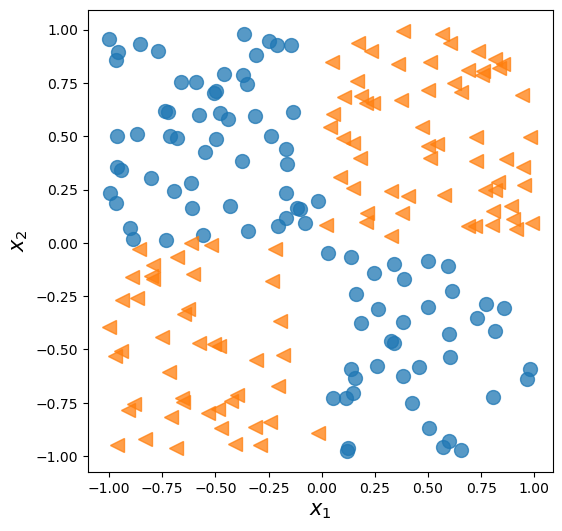

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


torch.manual_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))

y[x[:, 0] * x[:, 1] < 0] = 0

N_TRAIN = 100

x_train = torch.tensor(x[:N_TRAIN, :], dtype=torch.float32)
y_train = torch.tensor(y[:N_TRAIN], dtype=torch.float32)
x_valid = torch.tensor(x[N_TRAIN:, :], dtype=torch.float32)
y_valid = torch.tensor(y[N_TRAIN:], dtype=torch.float32)

fig = plt.figure(figsize=(6,6))
plt.plot(x[y == 0, 0], x[y == 0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y == 1, 0], x[y == 1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [2]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [3]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [6]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
BATCH_SIZE = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
torch.manual_seed(1)
NUM_EPOCHS = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred > 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= N_TRAIN
        accuracy_hist_train[epoch] /= (N_TRAIN / BATCH_SIZE)
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    
    return (loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid)

In [7]:
history = train(model, num_epochs=NUM_EPOCHS, train_dl=train_dl, x_valid=x_valid, y_valid=y_valid)

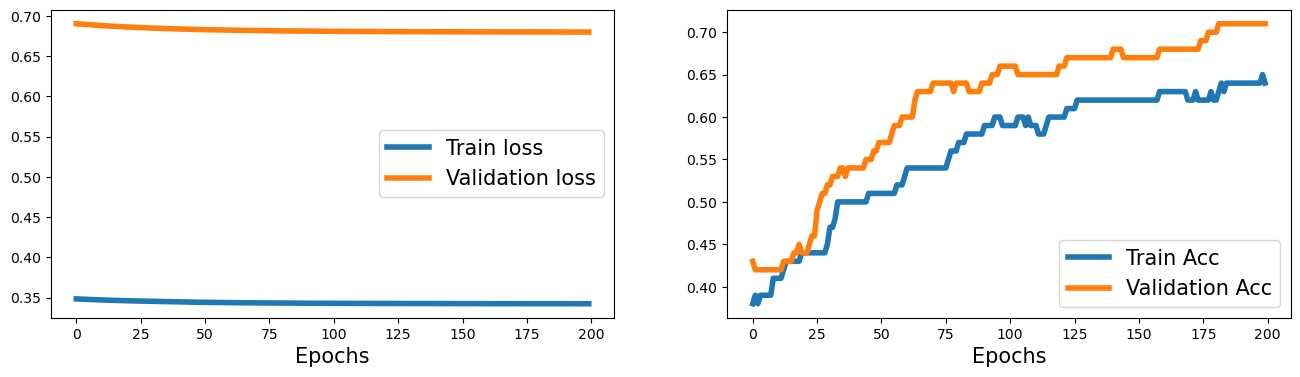

In [9]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train Acc', 'Validation Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()

In [10]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [11]:
history = train(model, num_epochs=NUM_EPOCHS, train_dl=train_dl, x_valid=x_valid, y_valid=y_valid)

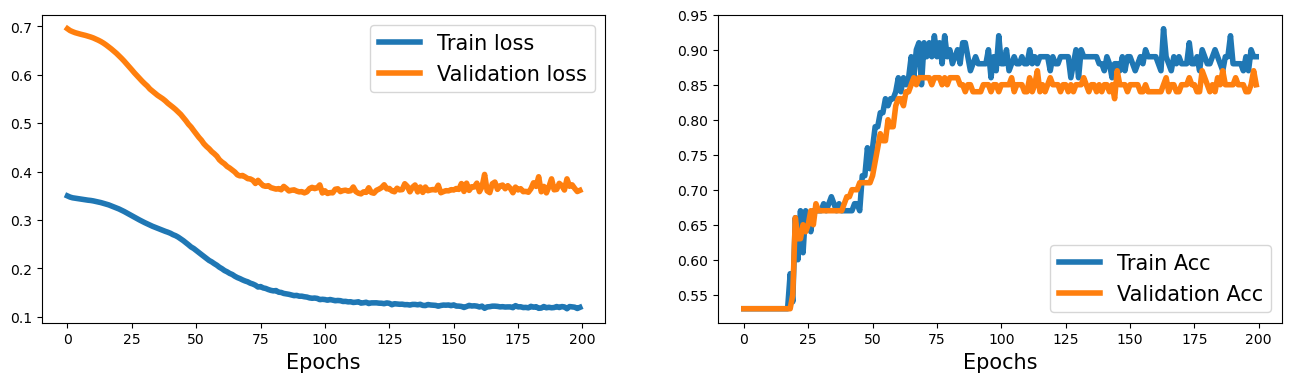

In [12]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train Acc', 'Validation Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
plt.show()